

**Actividad 6: Redes neuronales**

Diego Eduardo Ortega Estrella

1994855

N4

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [3]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data


In [7]:
#NUmero de clases

class_names = ['cero', 'one', 'Two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine', 'ten']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

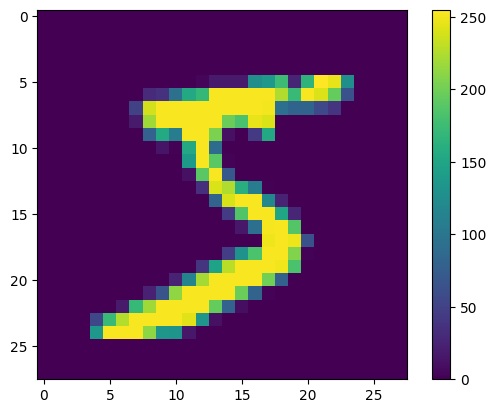

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

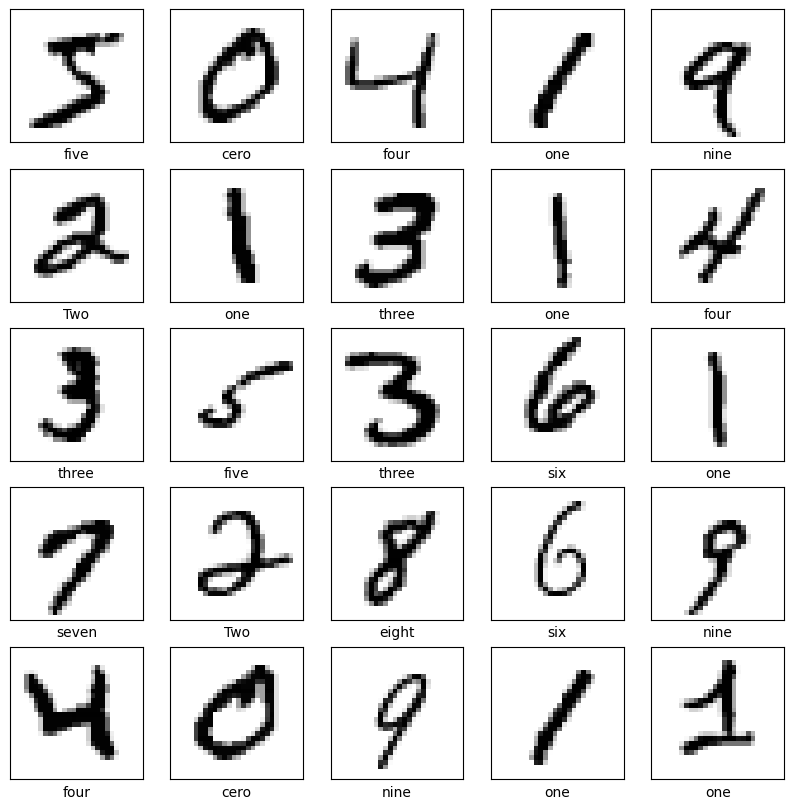

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
#Generar modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.4460 - accuracy: 0.8573
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2523 - accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2063 - accuracy: 0.9319
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1827 - accuracy: 0.9408
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1555 - accuracy: 0.9491
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1328 - accuracy: 0.9564
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1190 - accuracy: 0.9606
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1088 - accuracy: 0.9636
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0997 - accuracy: 0.9674
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1191 - accuracy: 0.9627 - 1s/epoch - 4ms/step

Test accuracy: 0.9627000093460083


In [25]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [26]:
predictions[0]

array([1.3157463e-08, 1.9779534e-06, 5.7640091e-06, 1.5699679e-04,
       2.8419414e-10, 1.0848289e-08, 1.2100656e-13, 9.9983382e-01,
       5.5694569e-09, 1.4870097e-06], dtype=float32)

In [27]:
np.argmax(predictions[0])

7

In [28]:
test_labels[0]

7

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

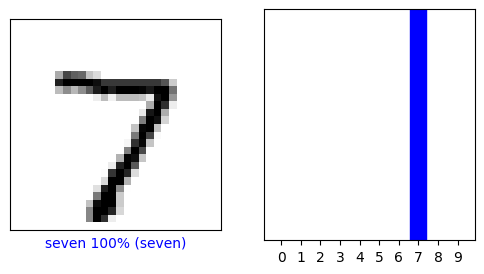

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

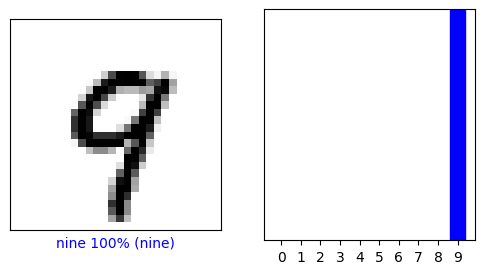

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

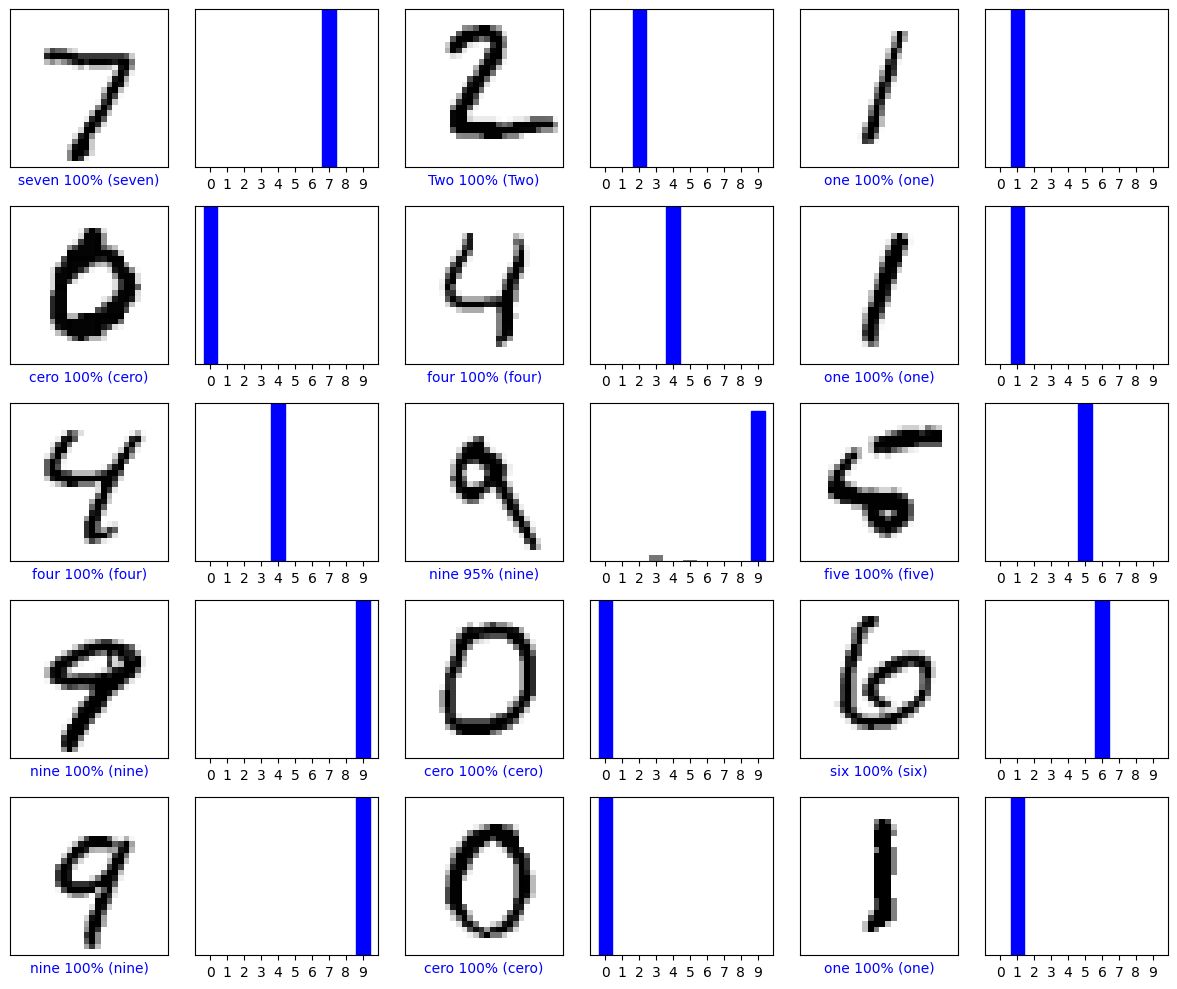

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[2.8651217e-08 1.0812539e-05 9.9994731e-01 4.1862757e-05 2.0587509e-16
  3.4545337e-08 2.1179924e-10 8.8464267e-09 5.5881820e-08 7.8071109e-12]]


In [37]:
np.argmax(predictions_single[0])

2

¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

**  Fueron las mismas epocas de entrenamiento que se realizaron en la actividad 5**


¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

**  Si hubo una mejora en este modelo de la actividad 6, porque se obtuvieron resultados mas certeros a comparacion de la anterior **